<a href="https://colab.research.google.com/github/AkashGir/Linkedin-Skill-Gap-Analyzer/blob/main/LinkedIn_Skill_Gap_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 97.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


100%|██████████| 159M/159M [00:01<00:00, 149MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/arshkon/linkedin-job-postings/versions/13
Dataset shape: (123849, 31)
    job_id           company_name                              title  \
0   921716  Corcoran Sawyer Smith              Marketing Coordinator   
1  1829192                    NaN  Mental Health Therapist/Counselor   

                                         description  max_salary pay_period  \
0  Job descriptionA leading real estate firm in N...        20.0     HOURLY   
1  At Aspen Therapy and Wellness , we are committ...        50.0     HOURLY   

           location  company_id  views  med_salary  ...  \
0     Princeton, NJ   2774458.0   20.0         NaN  ...   
1  Fort Collins, CO         NaN    1.0         NaN  ...   

                                         skills_desc   listed_time  \
0  Requirements: \n\nWe are seeking a College or ...  1.713398e+12   
1                                                NaN  1.712858e+12   

   posting_domain  sponsored  w

/tmp/ipython-input-3865547007.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Skill', x='Count', data=top_skills, palette='viridis')


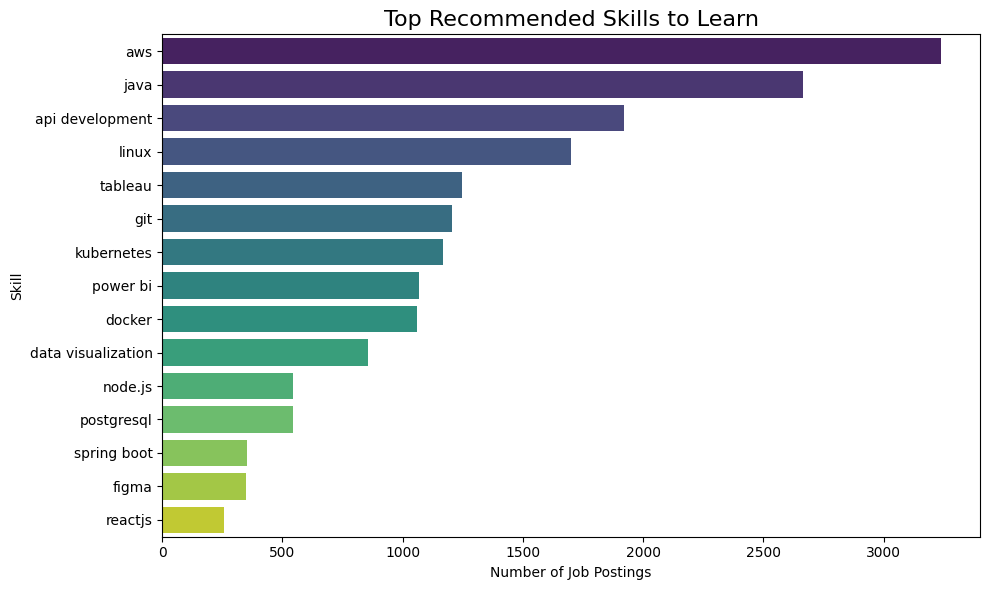

In [1]:
# ======================================
# STEP 0: Install dependencies
# ======================================
!pip install kagglehub spacy matplotlib seaborn
!python -m spacy download en_core_web_sm

# ======================================
# STEP 1: Download dataset from Kaggle
# ======================================
import kagglehub
import os
import pandas as pd

path = kagglehub.dataset_download("arshkon/linkedin-job-postings")
print("Path to dataset files:", path)

for file in os.listdir(path):
    if file.endswith(".csv"):
        dataset_path = os.path.join(path, file)
        break

df = pd.read_csv(dataset_path)
print(f"Dataset shape: {df.shape}")
print(df.head(2))

# ======================================
# STEP 2: Keep relevant columns
# ======================================
df = df[['title', 'description']].dropna()
df.columns = ['job_title', 'job_description']

# ======================================
# STEP 3: Skill extraction with normalization
# ======================================
import spacy
import re
nlp = spacy.load("en_core_web_sm")

# Predefined skill mapping (normalizing variants)
skill_mapping = {
    'python': ['python'],
    'java': ['java'],
    'sql': ['sql'],
    'aws': ['aws', 'amazon web services'],
    'docker': ['docker'],
    'postgresql': ['postgresql', 'postgres'],
    'spring boot': ['spring boot'],
    'reactjs': ['reactjs', 'react.js', 'react js'],
    'html': ['html'],
    'css': ['css'],
    'javascript': ['javascript', 'js'],
    'machine learning': ['machine learning', 'ml'],
    'tensorflow': ['tensorflow'],
    'data visualization': ['data visualization'],
    'figma': ['figma'],
    'redis': ['redis'],
    'api development': ['api development', 'api'],
    'kubernetes': ['kubernetes'],
    'c++': ['c++'],
    'c#': ['c#'],
    'power bi': ['power bi'],
    'tableau': ['tableau'],
    'node.js': ['node.js', 'nodejs'],
    'git': ['git'],
    'linux': ['linux']
}

# Flatten all keywords for search
skill_variants = {variant: key for key, variants in skill_mapping.items() for variant in variants}

def extract_skills(text):
    text_lower = text.lower()
    found_normalized = set()
    for variant, base_skill in skill_variants.items():
        if re.search(r'\b' + re.escape(variant) + r'\b', text_lower):
            found_normalized.add(base_skill)
    return list(found_normalized)

df['skills'] = df['job_description'].apply(extract_skills)

# ======================================
# STEP 4: Compare with your skills
# ======================================
your_skills = ['python', 'sql', 'html', 'css', 'javascript', 'machine learning']

from collections import Counter
missing_skills = []

for skills in df['skills']:
    for s in skills:
        if s not in your_skills:
            missing_skills.append(s)

skill_freq = Counter(missing_skills)
ranked_skills = sorted(skill_freq.items(), key=lambda x: x[1], reverse=True)

# ======================================
# STEP 5: Display ranked missing skills
# ======================================
print("\nTop Recommended Skills to Learn:")
for skill, freq in ranked_skills:
    relevance_score = freq / len(df)
    print(f"{skill:<20} | Relevance: {relevance_score:.2%} ({freq} job postings)")

# ======================================
# STEP 6: Visualization
# ======================================
import matplotlib.pyplot as plt
import seaborn as sns

top_n = 15  # Top skills to display
top_skills = pd.DataFrame(ranked_skills, columns=['Skill', 'Count']).head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(y='Skill', x='Count', data=top_skills, palette='viridis')
plt.title('Top Recommended Skills to Learn', fontsize=16)
plt.xlabel('Number of Job Postings')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()
